###COMP3359 Artificial Intelligence Applications
Department of Computer Science, HKU
<br><br>

# <u>Checkpoint 2 – Clustering of Multivariate Data</u>

## Estimated Time to Finish:  
2~4 hours  

## Main Learning Objectives:  
-	To have a basic understanding of unsupervised learning.
-	To experience handling of unsupervised learning problem with multivariate data. 
-	To experiment with evaluating an unsupervised learning model via a visualization.
-	To be able to consider a problem in both supervised and unsupervised settings.


## Overview  
1. [Introduction](#s1) 
2. [Problem Setting](#s2)
3. [Background Knowledge](#s3) 
4. [Task – Clustering on Iris Dataset](#s4) 
5. [Submission](#s5)

----- 


<a id=’s1’></a>
# 1 Introduction

Previously in “Example: Classification of Multivariate Data”, we have constructed a classifier model to predict if passengers would have survived from the Titanic tragedy. Our model learns from a __dataset with ground-truth labels__ (in this case, whether a passenger survived or not), so it knows how to improve itself by checking if its predictions match with the ground-truth labels or not. Learning from a labelled dataset like this is called __Supervised Learning__. The objective of supervised learning is usually to learn the underlying relation between input features and target labels.

In this checkpoint, we will consider a similar problem but from a different perspective. More specifically, we will still handle multivariate data as in “Example: Classification of Multivariate Data”, but this time we are not provided with ground-truth labels, so we need to consider some __Unsupervised Learning__ method. After completing this checkpoint, you will be able to handle multivariate data with a different approach, and together with what you did for the Titantic example, you should be able to consider a task from both Supervised and Unsupervised perspectives.

----- 


<a id=’s2’></a>
# 2 Problem Setting
In this section, we first describe the problem that we will be working on in this checkpoint.


## Problem Description
Consider yourself as an experienced botanist studying taxonomy of plants, so you have been working a lot on dividing plant species into categories. For example, tulip flowers can be classified into species like “tulipa clusiana” and “tulipa orphanidea”. This time, you come across the iris species. However, you have already been tired of classifying flowers manually, as you may have to study data of thousands of iris flowers before you can do a good classification. Therefore, you decided to construct an AI application to help you group iris flowers into smaller species, and see if the AI application would provide you with some unforeseen insights. 


## Dataset 
We are going to work on __Iris Dataset__ in this task, which is a multivariate dataset containing samples from 3 species of iris flowers. However, let’s forget about the number of species now, and indeed we should forget also what species each sample is, because as previously described we would like our AI to work these out automatically.

The Iris Dataset is a classical dataset (it's there since 1936) used by the pattern recognition community. It is also a __multivariate dataset__, same as the dataset we have studied in the “Titanic Passenger Survival Prediction” problem. 
The Iris Dataset contains 150 iris flower samples only; and it describes 4 features for each sample, namely “petal width", "petal length”, “sepal width", "sepal length”, as well as a flower species for the sample. To adapt to our designed scenario, we remove the ground-truth labels (i.e., the flower species) from the official Iris Dataset, making it an __unlabelled dataset__. 



You should always explore and get to know of your data before working out a solution.  The Iris dataset is simple, it's essentially a 150 rows x 5 columns tabular data.  The data file (a text file) from UCI is included [here](./data/iris.data) for your ease of access and you could take a look at it. 

(Optional) For more information about the data, you may refer to the links below: 
-	[UCI Machine Learning Repository – Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris)
    - An overall description, including the dataset itself
-	[Exploratory Data Analysis : Iris DataSet - RPubs]( https://rpubs.com/AjinkyaUC/Iris_DataSet)
    - As we study the dataset in an unsupervised setting, you may want to skip the plots that are plotted using 'species' feature, and the section 'Supervised Learning'


## Task for this Checkpoint
To quickly sum up, your task is to:
-	Construct an AI model to group flowers from Iris Dataset into smaller species.

You are given:
-	Iris Dataset, with 4 feature values describing of each flower in the dataset

You do not know:
-	Species (labels) of each flower in the dataset.
-	How many species of iris (should there be) in the dataset.
-	Feature values of known iris species.
  - It is note-worthy that you do not want to utilize any existing knowledge of iris species for this task, because you do not want to rule out the possibility of discovering new way to categorize iris flowers. Thus, you do not prefer identifying species in the dataset by comparing them to features of known iris species, nor methods that go against your preference here.

You may have found that things are getting a little bit tricky here because all irises are not labelled beforehand in your dataset.  This is different to the case of the Titantic dataset, in which each passenger in the training data is known to be survived or not, and our task is to classify passenger in the test data as survived or not (and then we see how accurate our classification is by comparing to the original "ground-truth" labels of the passenger in the test data). Hence, we deal with the Titanic problem with a Supervised, (Binary) Classification method.

Now, for the Iris dataset, although our target is to group the iris flowers into __some__ species, we know nothing about what the groups should be and how many groups there should be.  So this is a typical __Unsupervised Learning__ problem, in which we try to learn from an unlabelled dataset.  

----- 


<a id=’s3’></a>
# 3 Background Knowledge
In this section, some related concepts are introduced to support us to construct our AI model. 


## Unsupervised Learning 

For __Unsupervised Learning__ problems, __ground-truth labels are not provided__, so each data instance is only described by its features. Many Unsupervised Learning methods assume input data to follow some underlying distribution, and attempt to learn this distribution from training data. Therefore, even without training with ground-truth labels, we can still handle unseen data instances which are, ideally, coming from the learned distribution. For example, if we have already learnt from the training data that a certain group of irises form a species, and now we have a new iris flower having similar features to that group of irises, then the new iris would be considered as coming from the same species.

So now, since we do not know the “correct species” for each iris flower in the dataset (or else, our task has already been done), this gives us the very motivation to study Unsupervised Learning methods.  . 

Meanwhile, with your experience as a botanist, you may “assume” that flowers in the same species have similar features. In other words, it does not make sense to tell that two iris flowers having similar “petal width/length” and “sepal width/length” are from different species (assuming these are the only features that matter). Here, you may consider features of iris flowers of the same species are drawn from the same “distribution”, hence the feature values are similar.


## Clustering
__Clustering__ is a ML method which is used to group similar data points into __clusters__. Similarity of data points is determined solely by their feature values, hence Clustering is an Unsupervised Learning method. Imagine that people are located on a map and people are represented by their xy-coordinates on the map. We may form communities (clusters), by grouping people close to each other (i.e., those with small distances between their xy-oordinates (the features)).

Here, it is worth emphasizing the difference between Clustering and Classification. Usually, __Clustering__ refers to methods grouping similar data points into clusters, as in an Unsupervised Learning setting, while __Classification__ refers to methods determining each data instance into one of the known possible classes, as in a Supervised Learning setting.

As we have discussed above, we consider iris flowers from the same species are having similar feature values. Therefore, it will be natural for us to handle our problem using some Clustering method, to group iris flowers with similar feature values into clusters.


## Recommended Materials (Optional)
Our discussions in [“2 Problem Setting”](#s2) and [“3 Background Knowledge”](#s3) may not have introduced every single detail of the related concepts. However, you should be clear about the problem setting and our approach to handle it. In particular, you should have recognized __the difference between our problem here and the “Titanic Passenger Survival Prediction” problem we have studied before__, and __why these two problems are handled by Unsupervised and Supervised Learning methods, respectively__.

If you still feel unsure about the discussion, here are some suggested materials for you.

Unsupervised Learning:
- [DataRobot – Unsupervised Machine Learning](https://www.datarobot.com/wiki/unsupervised-machine-learning/)
- [Difference between Supervised and Unsupervised Learning]( https://www.geeksforgeeks.org/difference-between-supervised-and-unsupervised-learning/)


Clustering:
- [Clustering Algorithms]( https://developers.google.com/machine-learning/clustering/clustering-algorithms)
- [Introduction to Clustering]( https://www.youtube.com/watch?v=4cxVDUybHrI)

----- 


<a id=’s4’></a>
# 4 Task – Clustering on Iris Dataset

In this section, we will construct our AI model to perform clustering on the Iris Dataset, in order to group iris flowers into species. We will divide our work into smaller steps, and provide explanation for each step. However, some steps will be left out for you to complete, by following the instructions provided. Some questions will also be asked regarding the results of training the model. Your task is then to fill in the missing parts and give answers to the questions.


## Prepare Dataset
We first prepare the dataset for our task.  We need to make sure that it should contain the four input features “petal width", "petal length”, “sepal width", "sepal length” only.


In [1]:
""" Prepare Dataset """
#############################################
# Please do not modify the following codes. #
#############################################

# Download Iris dataset from Scikit-Learn
from sklearn.datasets import load_iris
data = load_iris()

# Data features
# In unsupervised setting, we will build our model only with input features.
data_X = data.data
print("Input feature shape: ", data_X.shape)
print("Example data:")
print(data_X[:5])

Input feature shape:  (150, 4)
Example data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Construct AI Model
In this section, we will construct an Unsupervised Clustering model to group iris flowers into clusters. First, let’s have a discussion on the clustering method we will use.

In this study, we will use the __K-Means Clustering__ method. Imagine we can group our data points into clusters. For each cluster of points, we can compute the “average point”, or _centroid_, and represent the cluster with its centroid. After computing the centroids of all clusters, we can then group a data instance with its closest centroid to the same cluster. K-Means Clustering method aims at learning centroids of clusters from unlabelled data points. 

(Optional) The discussion above only provide a conceptual description of K-Means Clustering method. Although the technical details of K-Means Clustering are skipped, it should be enough for us to construct our AI model. If you would like to learn more about principles of K-Means Clustering, here are some suggested materials.

- [K-Means Clustering with scikit-learn](https://dev.to/nexttech/k-means-clustering-with-scikit-learn-14kk)
- [Understanding K-means Clustering in Machine Learning](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)
- [K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks]( https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)
- [In Depth: k-Means Clustering]( https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
- [StatQuest: K-means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)
    - Video about an 1D example of K-Means clsutering


<u>Question 1</u><br>
Let’s start constructing our model! Complete the model and give predictions on our dataset by filling in the missing parts. Note that you are not required to come up with a model which gives optimized performance. 

In [22]:
""" First Attempt to Construct Model """
########################################################
# Please fill in the missing (commented) lines.        #
# Your model is expected to give predictions           #
# and store them in the variable 'preds'.              #
########################################################

# Global variable used for this study
RAND_SEED = 3359

# We will use KMeans model from Scikit-Learn
from sklearn.cluster import KMeans

# Construct KMeans model. Please feel free to choose your own model paramters.
# You may refer to: 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=2, random_state=RAND_SEED)



# Fit data into our KMeans model for training
kmeans = kmeans.fit(data_X)
#print("kmeans.labels_", kmeans.labels_)

# Give predictions
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Module 2 - Classification and Clustering of Multivariate Data/Checkpoint/data/iris.data'
df_test = pd.read_csv(data_path, header=None)
#print("df_test", df_test)

df_test_selected1 = df_test.drop(df_test.columns[4],axis=1)
#print("df_test_selected1", df_test_selected1)
df_test_features = df_test_selected1.to_dict(orient='records')
#print("df_test_features", df_test_features)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
test_features = vec.fit_transform(df_test_features).toarray()
#print("test_features", test_features)
preds = kmeans.predict(test_features)

# Training results (You may check if your mode works)
print("Example predictions: ")
print(preds[:10])
print(preds)
print("Cluster centers: ")
print(kmeans.cluster_centers_)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Example predictions: 
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Cluster centers: 
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]


<u>Question 2</u><br>
With our predictions prepared, let’s visualize our predictions and see how our model is performing.


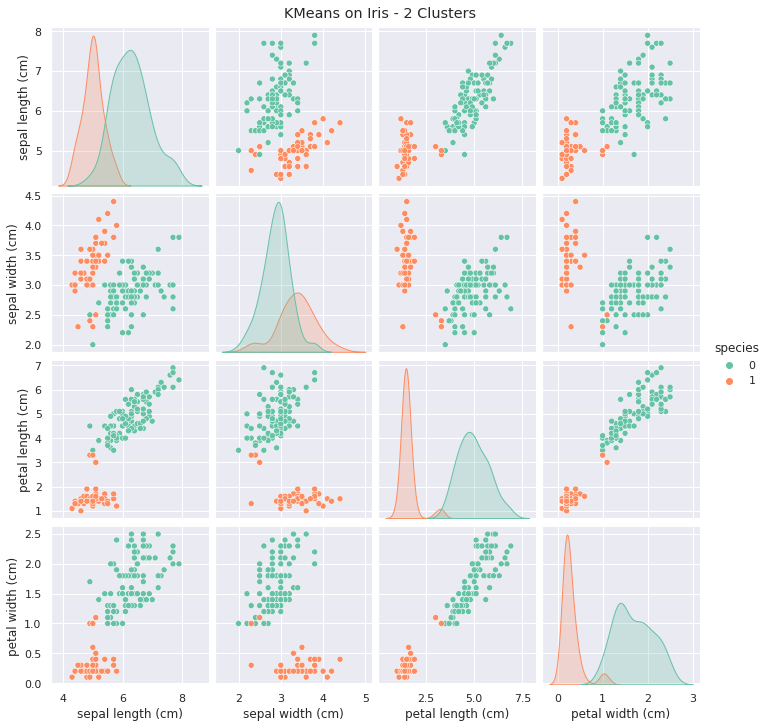

In [18]:
""" Visualize Predictions """
########################################################
# We assume predictions are prepared in previous code  #
# cell ('preds'). There should be no need to modify    #
# codes in this cell.                                  #
########################################################

# Visualizing predictions with Seaborn pairplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="Set2")

# Pack data into pd DataFrame. Seaborn pairplot operates on pd DataFrame.
import pandas as pd
X_df = pd.DataFrame(data_X, columns=data.feature_names)
y_df = pd.DataFrame({'species':preds})
df = pd.concat([X_df, y_df], axis=1)  

# Visualize results
grid = sns.pairplot(data=df, hue='species', vars=data.feature_names)
grid.fig.suptitle("KMeans on Iris - 2 Clusters", y=1.01)
plt.show()

Observing from the visualization, please briefly comment on the performance of your model (e.g. Are similar data points grouped together? Are there too many or too few clusters?)

There are 2 clusters of points distributed quite distinctively. However, it is observed that some orange points from species "1" is mixed with the green points cluster from species "0".  These implies that there are too few clusters.


<u>Question 3</u><br>
Make __one modification__ to your previous model (e.g. by changing one KMeans model parameter), and briefly discuss how and why the performance is changed, or not changed.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Example predictions: 
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Cluster centers: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


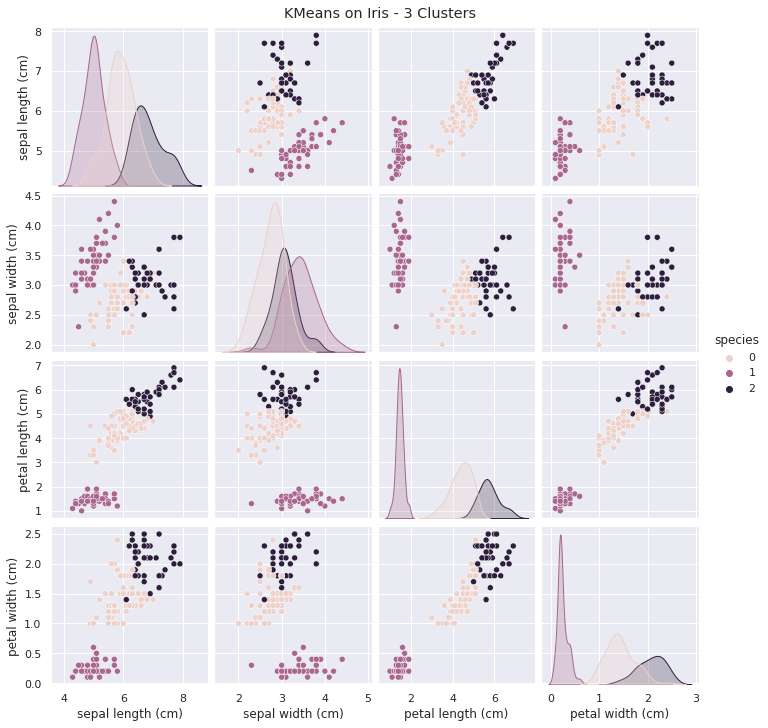

In [23]:
""" First Attempt to Construct Model """
########################################################
# Please fill in the missing (commented) lines.        #
# Your model is expected to give predictions           #
# and store them in the variable 'preds'.              #
########################################################

# Global variable used for this study
RAND_SEED = 3359

# We will use KMeans model from Scikit-Learn
from sklearn.cluster import KMeans

# Construct KMeans model. Please feel free to choose your own model paramters.
# You may refer to: 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=3, random_state=RAND_SEED)



# Fit data into our KMeans model for training
kmeans.fit(data_X)
#print(kmeans.labels_)

# Give predictions
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Module 2 - Classification and Clustering of Multivariate Data/Checkpoint/data/iris.data'
df_test = pd.read_csv(data_path, header=None)
#print(df_test)

df_test_selected1 = df_test.drop(df_test.columns[4],axis=1)
#print(df_test_selected1)
df_test_features = df_test_selected1.to_dict(orient='records')
#print(df_test_features)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
test_features = vec.fit_transform(df_test_features).toarray()
#print(test_features)
preds = kmeans.predict(test_features)

# Training results (You may check if your mode works)
print("Example predictions: ")
print(preds[:10])
print(preds)
print("Cluster centers: ")
print(kmeans.cluster_centers_)

# Visualizing predictions with Seaborn pairplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="Set2")

# Pack data into pd DataFrame. Seaborn pairplot operates on pd DataFrame.
import pandas as pd
X_df = pd.DataFrame(data_X, columns=data.feature_names)
y_df = pd.DataFrame({'species':preds})
df = pd.concat([X_df, y_df], axis=1)  

# Visualize results
grid = sns.pairplot(data=df, hue='species', vars=data.feature_names)
grid.fig.suptitle("KMeans on Iris - 3 Clusters", y=1.01)
plt.show()


After modifying the number of clusters in the KMeans Model, as we can observe from the visualisation, the 3 clusters of points are distributed even more distinctively. Especially, species "2" (purple group) is relatively distinct from other two groups. So, it is an good idea to try cluster = 4. 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Example predictions: 
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 2 2 3 2 3 2 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 0 0 0 0 2 0 0 0 3
 3 0 3 3 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 3 0 0 0 3 0 0 0 3 0 0 0 3 3
 0 3]
Cluster centers: 
[[6.9125     3.1        5.846875   2.13125   ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]
 [6.2525     2.855      4.815      1.625     ]]


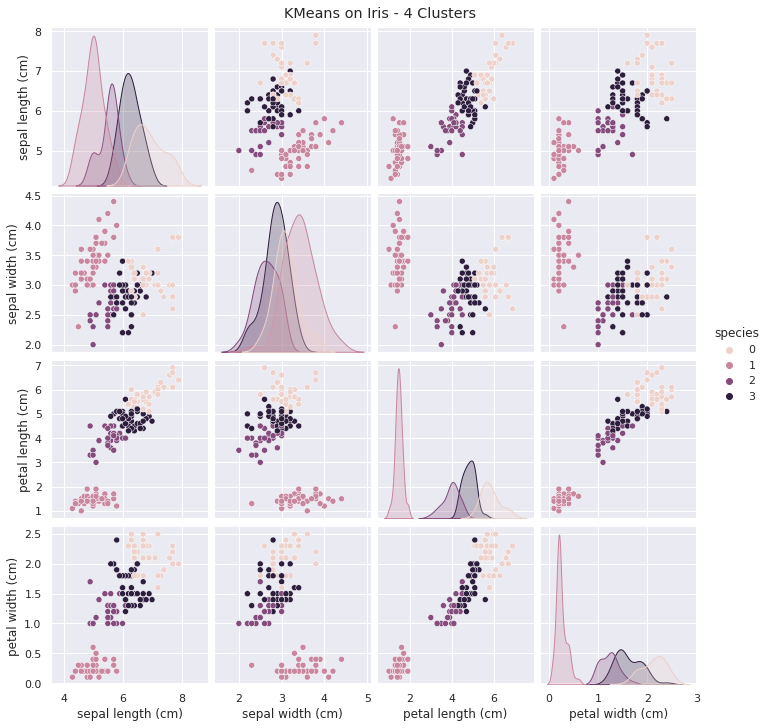

In [24]:
""" First Attempt to Construct Model """
########################################################
# Please fill in the missing (commented) lines.        #
# Your model is expected to give predictions           #
# and store them in the variable 'preds'.              #
########################################################

# Global variable used for this study
RAND_SEED = 3359

# We will use KMeans model from Scikit-Learn
from sklearn.cluster import KMeans

# Construct KMeans model. Please feel free to choose your own model paramters.
# You may refer to: 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=4, random_state=RAND_SEED)



# Fit data into our KMeans model for training
kmeans.fit(data_X)
#print(kmeans.labels_)

# Give predictions
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Module 2 - Classification and Clustering of Multivariate Data/Checkpoint/data/iris.data'
df_test = pd.read_csv(data_path, header=None)
#print(df_test)

df_test_selected1 = df_test.drop(df_test.columns[4],axis=1)
#print(df_test_selected1)
df_test_features = df_test_selected1.to_dict(orient='records')
#print(df_test_features)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
test_features = vec.fit_transform(df_test_features).toarray()
#print(test_features)
preds = kmeans.predict(test_features)

# Training results (You may check if your mode works)
print("Example predictions: ")
print(preds[:10])
print(preds)
print("Cluster centers: ")
print(kmeans.cluster_centers_)

# Visualizing predictions with Seaborn pairplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="Set2")

# Pack data into pd DataFrame. Seaborn pairplot operates on pd DataFrame.
import pandas as pd
X_df = pd.DataFrame(data_X, columns=data.feature_names)
y_df = pd.DataFrame({'species':preds})
df = pd.concat([X_df, y_df], axis=1)  

# Visualize results
grid = sns.pairplot(data=df, hue='species', vars=data.feature_names)
grid.fig.suptitle("KMeans on Iris - 4 Clusters", y=1.01)
plt.show()


After modifying the number of clusters in the KMeans Model, as we can observe from the visualisation, though species "1" (pink group) is relatively distinct from other two groups, the 4 clusters of points are less distint. It worths to note that 3 out of 4 clusters are close to one another, making them less distinctive.  So, there are too many clusters. 

In conclusion, from 2 to 4 clusters, dividing the data set into 3 clusters gives clearer separated groups. 

----- 


<a id=’s5’></a>
# 5 Submission

To complete this checkpoint, you will need to complete the missing codes and provide discussions on your results. You may prepare your works in this Jupyter notebook, a separated document file, or both. 

If you are preparing your answers in this Jupyter notebook, please feel free to add any code cells to write your codes, or any text cells for giving explanations. 

You may also prepare your answers in a separated document, for example, giving your discussions on your methods or any visualization to assist your illustration.

In either way, please keep your presentation clear and comprehensible. 

----- 
